# MPT Core Length Comparison

In [1]:
import pyleoclim as pyleo
import numpy as np
import ammonyte as ammo
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.transforms as transforms

from pangaeapy.pandataset import PanDataSet
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches

/Users/alexjames/miniconda3/envs/ammonyte/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#We suppress warnings for these notebooks for presentation purposes. Best practice is to not do this though.
import warnings
warnings.filterwarnings('ignore')

Time axis values sorted in ascending order
Initial density is 0.0069
Initial density is not within the tolerance window, searching...
Epsilon: 1.4308, Density: 0.0236
Epsilon: 1.6948, Density: 0.0581
Epsilon: 1.6948, Density: 0.0581.


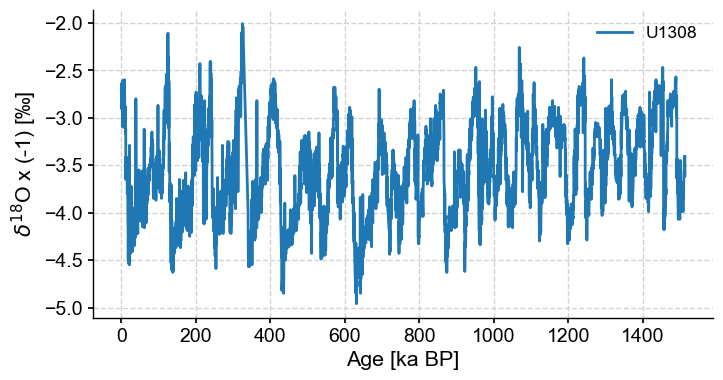

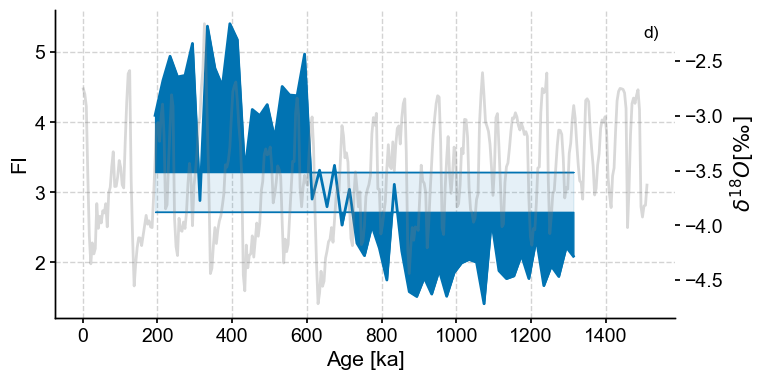

In [3]:
dsb = PanDataSet('10.1594/PANGAEA.831735')
tsb = pyleo.Series(time=dsb.data['Age'], value=dsb.data['C. wuellerstorfi δ18O'],
                      time_name='Age', time_unit='ka BP', label = 'U1308',
                      value_name='$\delta^{18}$O', value_unit=u'‰').flip()
tsb.plot(figsize=(8,4))

series = tsb.interp().bin(bin_size=4).convert_time_unit('Years')
series_lp = series.convert_time_unit('ka')

amt_series = ammo.Series(
    time=series.time,
    value=series.value,
    time_name = series.time_name,
    value_name = series.value_name,
    time_unit = series.time_unit,
    value_unit = series.value_unit,
    label = series.label,
    clean_ts=False,
    sort_ts=None
)
td = amt_series.embed(15)
eps = td.find_epsilon(1)
rm = eps['Output']
lp_series = rm.laplacian_eigenmaps(50,5)
lp_series = lp_series.convert_time_unit('ka')

fig,ax = plt.subplots(figsize=(8,4))
lp_series.confidence_fill_plot(ax=ax,title=None,legend=False)
ax.set_ylabel('FI')
ax_twin = ax.twinx()
series_lp.plot(ax=ax_twin,color='grey',alpha=.3,legend=False)
ax_twin.set_ylabel(r'$\delta^{18}O [‰]$')
ax_twin.grid(False)
patch = mpatches.Patch(fc="w", fill=False, edgecolor='none', linewidth=0,label='d)')
ax.legend(handles=[patch],loc='upper right')

# LR04 Core MPT Timing (Full)

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order


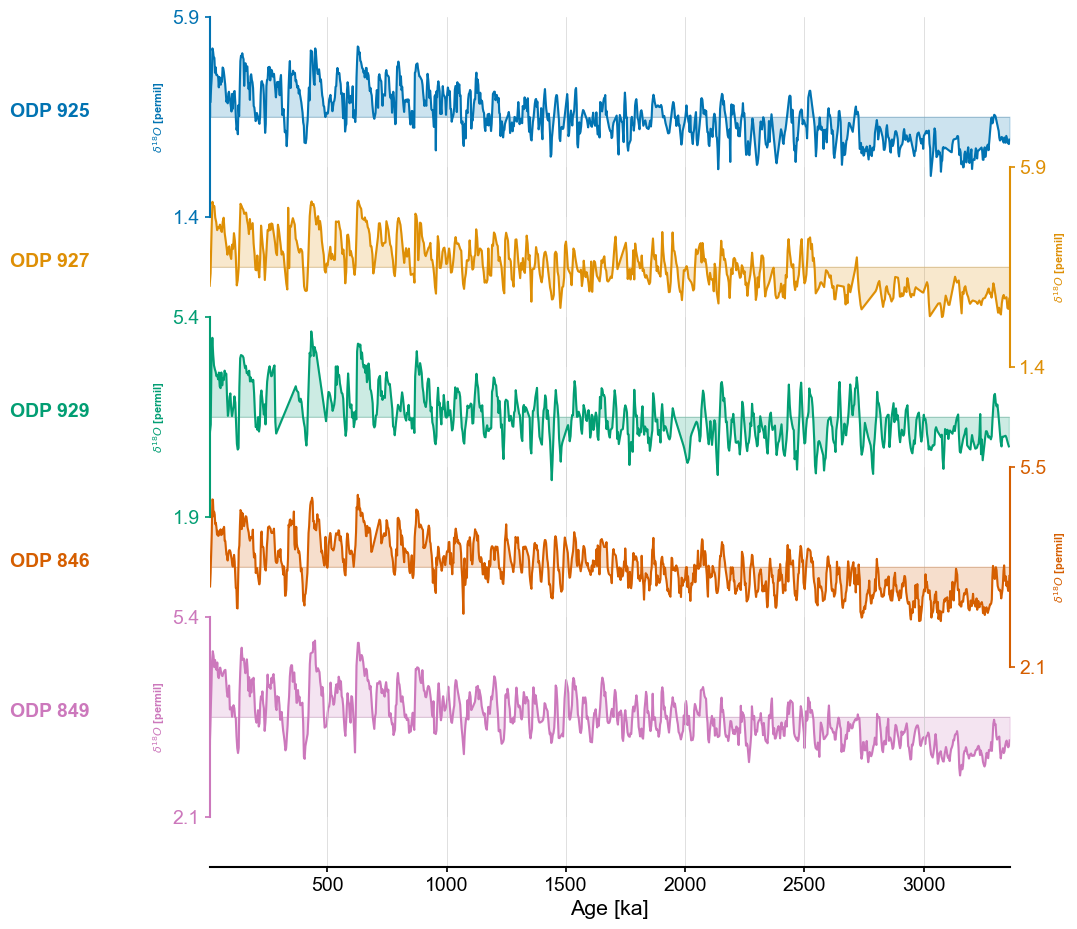

In [4]:
#Defining group lists for easy loading
group_names = ['ODP 925','ODP 927','ODP 929','ODP 846','ODP 849']

series_list = []
color_list = sns.color_palette('colorblind')

for name in group_names:
    with open('../data/LR04cores_spec_corr/'+name[-3:]+'_LR04age.txt','rb') as handle:
        lines = handle.readlines()
        time = []
        d18O = []
        for x in lines:
            line_time = float(format(float(x.decode().split()[1]),'10f'))
            line_d18O = float(format(float(x.decode().split()[2]),'10f'))
            #There is a discontinuity in 927 around 4000 ka, we'll just exclude it
            if line_time <= 4000:
                time.append(line_time)
                d18O.append(line_d18O)
        series = pyleo.Series(value=d18O,
                              time=time,
                              label=name,
                              time_name='Yr',
                              time_unit='ka',
                              value_name=r'$\delta^{18}O$',
                              value_unit='permil')
    series_list.append(series)
    
max_time = min([max(series.time) for series in series_list])
min_time = max([min(series.time) for series in series_list])

ms = pyleo.MultipleSeries([series.slice((min_time,max_time)).interp() for series in series_list])
fig,ax = ms.stackplot(colors=color_list[:len(ms.series_list)],figsize=(8,10))

In [5]:
lp_rm = {}
lp_fi = {}

m = 13
tau = 8

for idx,series in enumerate(ms.series_list):
    series = series.convert_time_unit('Years').interp().detrend(method='savitzky-golay')
    amt_series = ammo.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    )
    td = amt_series.embed(m=m)
    print(f'{series.label} tau is: {td.tau}')
    eps = td.find_epsilon(eps=1,target_density=.05,tolerance=.01)
    rm = eps['Output']
    lp_series = rm.laplacian_eigenmaps(w_size=50,w_incre=5)
    lp_series = lp_series.convert_time_unit('ka')
    lp_fi[series.label] = lp_series

ODP 925 tau is: 7
Initial density is 0.0183
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0183
Epsilon: 1.1584, Density: 0.0499
Epsilon: 1.1584, Density: 0.0499.


ODP 927 tau is: 4
Initial density is 0.0241
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0241
Epsilon: 1.1297, Density: 0.0511
Epsilon: 1.1297, Density: 0.0511.


ODP 929 tau is: 5
Initial density is 0.0263
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0263
Epsilon: 1.1186, Density: 0.0547
Epsilon: 1.1186, Density: 0.0547.


ODP 846 tau is: 8
Initial density is 0.1042
Initial density is not within the tolerance window, searching...
Epsilon: 0.4575, Density: 0.0016
Epsilon: 0.9417, Density: 0.0709
Epsilon: 0.9417, Density: 0.0709
Epsilon: 0.8373, Density: 0.0315
Epsilon: 0.8373, Density: 0.0315
Epsilon: 0.9300, Density: 0.0652
Epsilon: 0.9300, Density: 0.0652
Epsilon: 0.8537, Density: 0.0361
Epsilon: 0.8537, Density: 0.0361
Epsilon: 0.9234, Density: 0.0622
Epsilon: 0.9234, Density: 0.0622
Epsilon: 0.8625, Density: 0.0388
Epsilon: 0.8625, Density: 0.0388
Epsilon: 0.9185, Density: 0.0601
Epsilon: 0.9185, Density: 0.0601


Epsilon: 0.8681, Density: 0.0406
Epsilon: 0.8681, Density: 0.0406.


ODP 849 tau is: 5
Initial density is 0.0964
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0964
Epsilon: 0.7679, Density: 0.0149
Epsilon: 0.7679, Density: 0.0149
Epsilon: 0.9433, Density: 0.0654
Epsilon: 0.9433, Density: 0.0654
Epsilon: 0.8663, Density: 0.0362
Epsilon: 0.8663, Density: 0.0362
Epsilon: 0.9354, Density: 0.0618
Epsilon: 0.9354, Density: 0.0618
Epsilon: 0.8763, Density: 0.0392
Epsilon: 0.8763, Density: 0.0392
Epsilon: 0.9302, Density: 0.0594
Epsilon: 0.9302, Density: 0.0594.


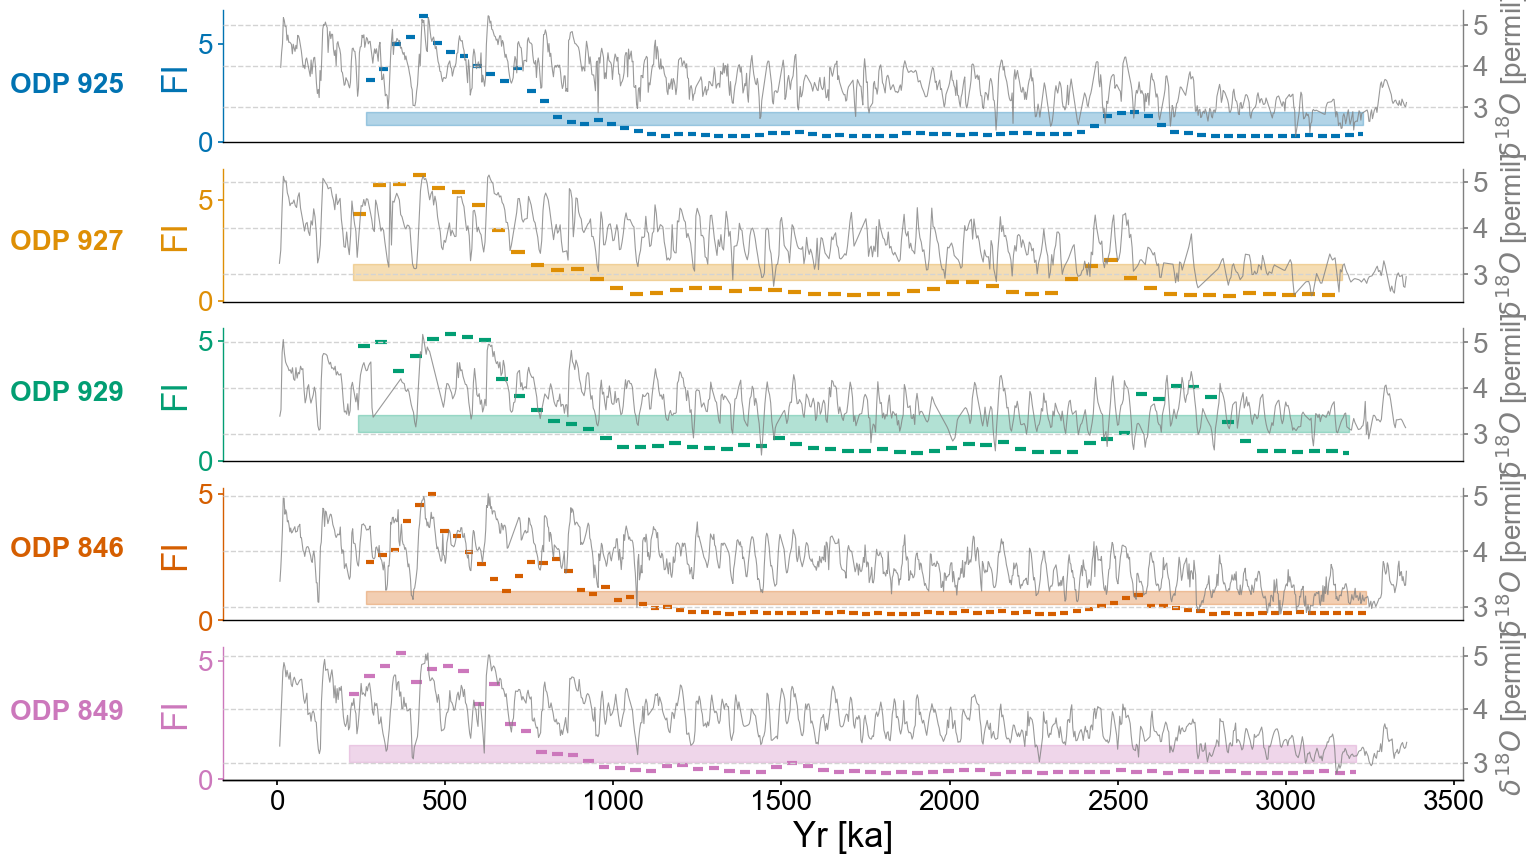

In [6]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,axes = plt.subplots(nrows=len(group_names),ncols=1,sharex=True,figsize=(16,10))
transition_timing = []

for idx,site in enumerate(group_names):
    ts = lp_fi[site]
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'

    ax = axes[idx]
    ts_smooth = ammo.utils.fisher.smooth_series(ts,3)
    upper, lower = ammo.utils.sampling.confidence_interval(ts)

    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx],
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.5, s = site, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold',fontsize=20)
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(group_names)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)
    ax.xaxis.label.set_fontsize(25)
    ax.yaxis.label.set_fontsize(25)
    ax.set_yticks(ticks=np.array([0,5]))

# LR04 Core MPT Timing (Sliced)

Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order
Time axis values sorted in ascending order


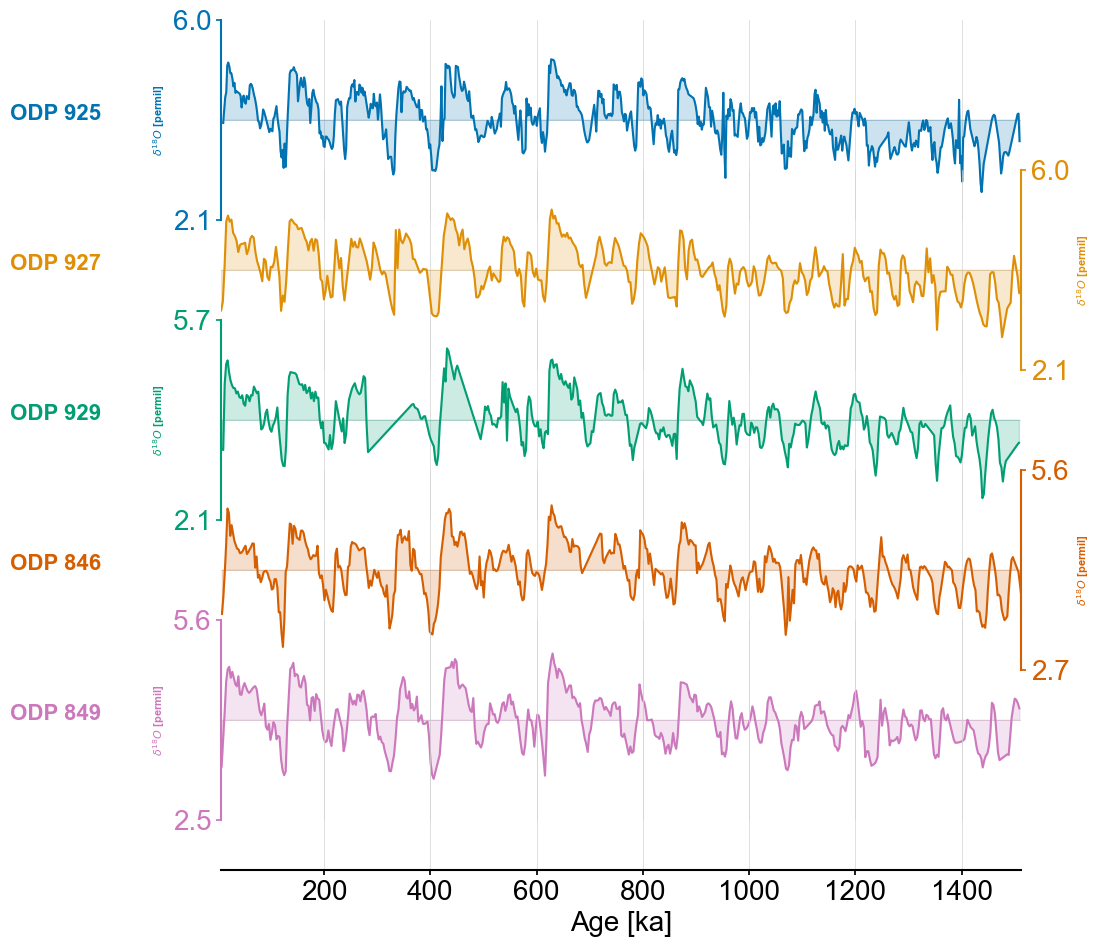

In [7]:
#Defining group lists for easy loading
group_names = ['ODP 925','ODP 927','ODP 929','ODP 846','ODP 849']

series_list = []
color_list = sns.color_palette('colorblind')

for name in group_names:
    with open('../data/LR04cores_spec_corr/'+name[-3:]+'_LR04age.txt','rb') as handle:
        lines = handle.readlines()
        time = []
        d18O = []
        for x in lines:
            line_time = float(format(float(x.decode().split()[1]),'10f'))
            line_d18O = float(format(float(x.decode().split()[2]),'10f'))
            #There is a discontinuity in 927 around 4000 ka, we'll just exclude it
            if line_time <= 4000:
                time.append(line_time)
                d18O.append(line_d18O)
        series = pyleo.Series(value=d18O,
                              time=time,
                              label=name,
                              time_name='Yr',
                              time_unit='ka',
                              value_name=r'$\delta^{18}O$',
                              value_unit='permil')
    series_list.append(series)
    
max_time = max(tsb.time)
min_time = max([min(series.time) for series in series_list])

ms = pyleo.MultipleSeries([series.slice((min_time,max_time)).interp() for series in series_list])
fig,ax = ms.stackplot(colors=color_list[:len(ms.series_list)],figsize=(8,10))

In [8]:
lp_rm = {}
lp_fi = {}

m = 13
tau = 8

for idx,series in enumerate(ms.series_list):
    series = series.convert_time_unit('Years').interp().detrend(method='savitzky-golay')
    amt_series = ammo.Series(
        time=series.time,
        value=series.value,
        time_name = series.time_name,
        value_name = series.value_name,
        time_unit = series.time_unit,
        value_unit = series.value_unit,
        label = series.label,
        clean_ts=False,
        sort_ts=None
    )
    td = amt_series.embed(m=m)
    print(f'{series.label} tau is: {td.tau}')
    eps = td.find_epsilon(eps=1,target_density=.05,tolerance=.01)
    rm = eps['Output']
    lp_series = rm.laplacian_eigenmaps(w_size=50,w_incre=5)
    lp_series = lp_series.convert_time_unit('ka')
    lp_fi[series.label] = lp_series

ODP 925 tau is: 7
Initial density is 0.0097
Initial density is not within the tolerance window, searching...
Epsilon: 1.4033, Density: 0.0698
Epsilon: 1.4033, Density: 0.0698
Epsilon: 1.3044, Density: 0.0442
Epsilon: 1.3044, Density: 0.0442.


ODP 927 tau is: 4
Initial density is 0.0082
Initial density is not within the tolerance window, searching...
Epsilon: 1.4179, Density: 0.0587
Epsilon: 1.4179, Density: 0.0587.


ODP 929 tau is: 6
Initial density is 0.0138
Initial density is not within the tolerance window, searching...
Epsilon: 1.3616, Density: 0.0716
Epsilon: 1.3616, Density: 0.0716
Epsilon: 1.2536, Density: 0.0445
Epsilon: 1.2536, Density: 0.0445.


ODP 846 tau is: 6
Initial density is 0.0314
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0314
Epsilon: 1.0929, Density: 0.0535
Epsilon: 1.0929, Density: 0.0535.


ODP 849 tau is: 4
Initial density is 0.0307
Initial density is not within the tolerance window, searching...
Epsilon: 1.0000, Density: 0.0307
Epsilon: 1.0966, Density: 0.0528
Epsilon: 1.0966, Density: 0.0528.


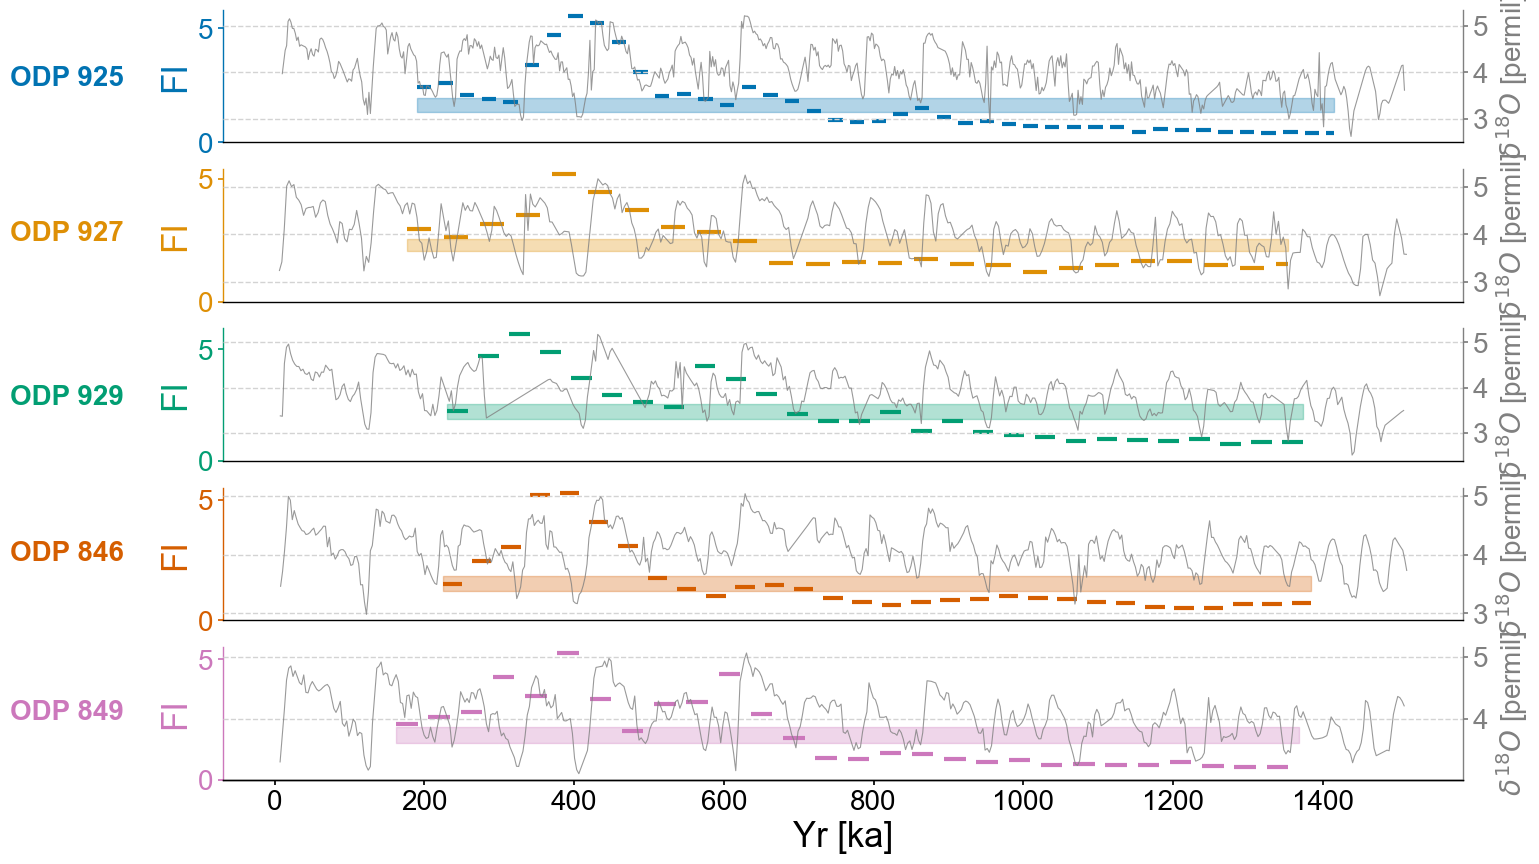

In [9]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig,axes = plt.subplots(nrows=len(group_names),ncols=1,sharex=True,figsize=(16,10))
transition_timing = []

for idx,site in enumerate(group_names):
    ts = lp_fi[site]
    ts.label = lp_series.label
    ts.value_name = 'FI'
    ts.value_unit = None
    ts.time_name = 'Yr'
    ts.time_unit = 'ka'

    ax = axes[idx]
    ts_smooth = ammo.utils.fisher.smooth_series(ts,3)
    upper, lower = ammo.utils.sampling.confidence_interval(ts)

    ts.confidence_smooth_plot(
        ax=ax,
        background_series = ms.series_list[idx],
        transition_interval=(upper,lower),
        block_size=3,
        color=color_list[idx],
        figsize=(12,6),
        legend=True,
        lgd_kwargs={'loc':'upper left'},
        hline_kwargs={'label':None},
        background_kwargs={'ylabel':'$\delta^{18}O$ [permil]','legend':False,'linewidth':.8,'color':'grey','alpha':.8})
    
    trans = transforms.blended_transform_factory(ax.transAxes, ax.transData)
    ax.text(x=-.08, y = 2.5, s = site, horizontalalignment='right', transform=trans, color=color_list[idx], weight='bold',fontsize=20)
        
    ax.spines['left'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_label_position('left')
    ax.yaxis.tick_left()
    ax.get_legend().remove()
    ax.set_title(None)
    ax.grid(visible=False,axis='y')
    if idx != len(group_names)-1:
        ax.set_xlabel(None)
        ax.spines[['bottom']].set_visible(False)
        ax.tick_params(bottom=False)
    ax.xaxis.label.set_fontsize(25)
    ax.yaxis.label.set_fontsize(25)
    ax.set_yticks(ticks=np.array([0,5]))